<a href="https://colab.research.google.com/github/ToanToan110/Project_ML/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Liên kết với Drive**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as implt
import os
import seaborn as sns
import cv2 as cv
from PIL import Image
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/My Drive/DataSet_Male_female/Dataset_Male_female.zip'

In [ ]:
train_path = "/content/Dataset_Male_female/genderdetectionface/dataset1/train"
test_path = "/content/Dataset_Male_female/genderdetectionface/dataset1/test"

train_woman = sorted(os.listdir(train_path +'/woman'))
train_man =  sorted(os.listdir(train_path +'/man'))

test_woman = sorted(os.listdir(test_path +'/woman'))
test_man =  sorted(os.listdir(test_path +'/man'))

Tạo tập train_path bao gồm tất cả các hình ảnh trong tập train



*   train_man: tất cả ảnh male trong tập train
*   train_woman: tất cả ảnh female trong tập train
*   test_man: tất cả ảnh male trong tập train
*   test_woman: tất cả ảnh female trong tập train

Text(0.5, 1.0, 'Số lương hình ảnh được huấn luyện:')

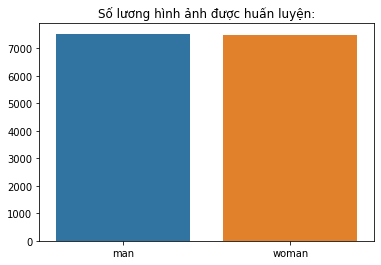

In [ ]:
# Số lượng hình ảnh male và female trong dataset
category_names = sorted(os.listdir(train_path))
img_pr_cat = []
for category in category_names:
    folder = train_path + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(x=category_names, y=img_pr_cat).set_title("Số lương hình ảnh được huấn luyện:")


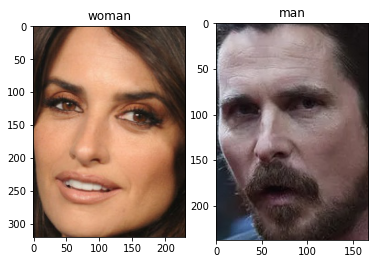

In [ ]:
img_1 = implt.imread(train_path +'/woman/face_561.jpg')
img_2 = implt.imread(train_path +'/man/face_999.jpg')

plt.subplot(1, 2, 1)
plt.title('woman')
plt.imshow(img_1)       
plt.subplot(1, 2, 2)
plt.title('man')
plt.imshow(img_2) 

In ra 2 hình ảnh đại diện trong tập train của nam và nữ và nhận xét :

Kích cỡ size ảnh khác nhau => xử lí để nhất quán dữ liệu

In [ ]:
img_size = 50
women_faces = []
men_faces = [] 
label = []

for i in train_woman:
        
        if os.path.isfile(train_path +'/woman/'+ i):
            faces = Image.open(train_path +'/woman/'+ i).convert('L') #Chuyển thành ảnh xám            
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS) #resizing thành 50,50
            faces = np.asarray(faces)/255.0 #normalizing images chia số pixel cho nhỏ lại để tiện cho tính toán
            women_faces.append(faces)  
            label.append(1) #1 là nữ
 
for i in train_man:
        if os.path.isfile(train_path+'/man/'+ i):
            faces = Image.open(train_path+'/man/'+ i).convert('L')
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS)
            faces = np.asarray(faces)/255.0 #normalizing images
            men_faces.append(faces)  
            label.append(0) #0 là nam         
           
x_train = np.concatenate((women_faces,men_faces),axis=0) # Gom tất cả các vecto ảnh lại
x_train_label = np.asarray(label)# biến tập nhãn thành mảng label gồm 0 và 1
x_train_label = x_train_label.reshape(x_train_label.shape[0],1) #nhãn sẽ có 1 cột và số hàng bằng số train_dataset

print("women_faces:",np.shape(women_faces) , "men_faces:",np.shape(men_faces))
print("train_dataset:",np.shape(x_train), "train_values:",np.shape(x_train_label))

women_faces: (7490, 50, 50) men_faces: (7531, 50, 50)
train_dataset: (15021, 50, 50) train_values: (15021, 1)


Làm tương tự với tập test:

In [ ]:
img_size = 50
women_faces = []
men_faces = [] 
label = []

for i in test_woman:
        if os.path.isfile(test_path +'/woman/'+ i):
            faces = Image.open(test_path +'/woman/'+ i).convert('L')            
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS)
            faces = np.asarray(faces)/255.0
            women_faces.append(faces)  
            label.append(1)     
 
for i in test_man:
        if os.path.isfile(test_path+'/man/'+ i):
            faces = Image.open(test_path+'/man/'+ i).convert('L')
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS)
            faces = np.asarray(faces)/255.0            
            men_faces.append(faces)
            label.append(0)                       

x_test = np.concatenate((women_faces,men_faces),axis=0) # test dataset
x_test_label = np.asarray(label) # corresponding labels
x_test_label = x_test_label.reshape(x_test_label.shape[0],1)

print("women_faces:",np.shape(women_faces), "men_faces:",np.shape(men_faces))
print("test_dataset:",np.shape(x_test), "test_values:",np.shape(x_test_label))

women_faces: (778, 50, 50) men_faces: (805, 50, 50)
test_dataset: (1583, 50, 50) test_values: (1583, 1)


In [ ]:
x = np.concatenate((x_train,x_test),axis=0) #train_data
y = np.concatenate((x_train_label,x_test_label),axis=0) #test data
#chế tác đặc trưng:
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]) #flatten 3D image array to 2D# duỗi từng ảnh thành 1 vecto có kích thước 1x2500
print("images:",np.shape(x), "labels:",np.shape(y))#số lượng train và test

images: (16604, 2500) labels: (16604, 1)


In [ ]:
#Phân chia dữ liệu thành tập train test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("train number:",len(X_train), "test number:",len(X_test))

train number: 13283 test number: 3321


**Áp dụng các model dê tính độ chính xác**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
#tạo 1 list để chưa các score của các model
model_list = []

**Model HỒi quy tuyến tính**

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
model_list.append(LR.score(X_test, Y_test))
predict=LR.predict(X_test)
print('Accuracy:  ',accuracy_score(Y_test,predict))
print('Classification report: \n',classification_report(Y_test,predict))
print('Confusion matrix: \n',confusion_matrix(Y_test,predict))


Accuracy:   0.7946401686239085
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1681
           1       0.80      0.79      0.79      1640

    accuracy                           0.79      3321
   macro avg       0.79      0.79      0.79      3321
weighted avg       0.79      0.79      0.79      3321

Confusion matrix: 
 [[1349  332]
 [ 350 1290]]


Accuracy: 0.7946 là độ chính xác và được tính là số lượng bình luận dự đoán đúng / tổng số bình luận.

Classification report: trong tập test có 1681 ảnh nhãn 0 và 1640 ảnh nhãn 1. Trong đó f1-score của nhãn 0 và 1 tương ứng là 80% và 79% với

f1-score=2 x (recall x precision)/(recall + precision) trong đó:

recall nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 trong thực tế)

precision nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 được model dự đoán)

Và f1-score trung bình theo cách tính weighted avg (có nhân với tỷ lệ của số lượng nhãn) là 0.79. (0.79= 0.8.(1681/3321)+0.79.(1640/3321))

Confsusion matrix:

model dự đoán đúng 1349 ảnh vốn có nhãn là 0

model dự đoán sai 350 ảnh vốn có nhãn là 1

model dự đoán sai 332 ảnh vốn có nhãn là 0

model dự đoán đúng 1290 ảnh vốn có nhãn là 1

=> accuracy = (1349+1290) / 3321 = 0,7946

**Model Linear Discriminant Analysis**

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,Y_train)
model_list.append(LDA.score(X_test, Y_test))
predict=LDA.predict(X_test)
print('Accuracy:  ',accuracy_score(Y_test,predict))
print('Classification report: \n',classification_report(Y_test,predict))
print('Confusion matrix: \n',confusion_matrix(Y_test,predict))

Accuracy:   0.7717554953327311
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      1681
           1       0.78      0.75      0.76      1640

    accuracy                           0.77      3321
   macro avg       0.77      0.77      0.77      3321
weighted avg       0.77      0.77      0.77      3321

Confusion matrix: 
 [[1333  348]
 [ 410 1230]]


Accuracy: 0.77 là độ chính xác và được tính là số lượng bình luận dự đoán đúng / tổng số bình luận.

Classification report: trong tập test có 1681 ảnh nhãn 0 và 1640 ảnh nhãn 1. Trong đó f1-score của nhãn 0 và 1 tương ứng là 78% và 76% với

f1-score=2 x (recall x precision)/(recall + precision) trong đó:

recall nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 trong thực tế)

precision nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 được model dự đoán)

Và f1-score trung bình theo cách tính weighted avg (có nhân với tỷ lệ của số lượng nhãn) là 0.77. (0.77= 0.78.(1681/3321)+0.76.(1640/3321))

Confsusion matrix:

model dự đoán đúng 1333 ảnh vốn có nhãn là 0

model dự đoán sai 410 ảnh vốn có nhãn là 1

model dự đoán sai 348 ảnh vốn có nhãn là 0

model dự đoán đúng 1230 ảnh vốn có nhãn là 1

=> accuracy = (1333+1230) / 3321 = 0,77

**Model K hàng xóm gần nhất**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k= KNeighborsClassifier()
k.fit(X_train,Y_train)
k.score(X_test, Y_test)
model_list.append(k.score(X_test, Y_test))
predict=k.predict(X_test)
print('Accuracy:  ',accuracy_score(Y_test,predict))
print('Classification report: \n',classification_report(Y_test,predict))
print('Confusion matrix: \n',confusion_matrix(Y_test,predict))

Accuracy:   0.7886178861788617
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.82      0.80      1681
           1       0.81      0.75      0.78      1640

    accuracy                           0.79      3321
   macro avg       0.79      0.79      0.79      3321
weighted avg       0.79      0.79      0.79      3321

Confusion matrix: 
 [[1383  298]
 [ 404 1236]]


Accuracy: 0.7886 là độ chính xác và được tính là số lượng bình luận dự đoán đúng / tổng số bình luận.

Classification report: trong tập test có 1681 ảnh nhãn 0 và 1640 ảnh nhãn 1. Trong đó f1-score của nhãn 0 và 1 tương ứng là 80% và 78% với

f1-score=2 x (recall x precision)/(recall + precision) trong đó:

recall nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 trong thực tế)

precision nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 được model dự đoán)

Và f1-score trung bình theo cách tính weighted avg (có nhân với tỷ lệ của số lượng nhãn) là 0.79. (0.79= 0.8.(1681/3321)+0.78.(1640/3321))

Confsusion matrix:

model dự đoán đúng 1383 ảnh vốn có nhãn là 0

model dự đoán sai 404 ảnh vốn có nhãn là 1

model dự đoán sai 298 ảnh vốn có nhãn là 0

model dự đoán đúng 1236 ảnh vốn có nhãn là 1

=> accuracy = (1383+1236) / 3321 = 0,7886

**Model cây quyết định**

In [ ]:
D = DecisionTreeClassifier()
D.fit(X_train,Y_train)
D.score(X_test, Y_test)
model_list.append(D.score(X_test, Y_test))
predict=D.predict(X_test)
print('Accuracy:  ',accuracy_score(Y_test,predict))
print('Classification report: \n',classification_report(Y_test,predict))
print('Confusion matrix: \n',confusion_matrix(Y_test,predict))

Accuracy:   0.7181571815718157
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1681
           1       0.71      0.73      0.72      1640

    accuracy                           0.72      3321
   macro avg       0.72      0.72      0.72      3321
weighted avg       0.72      0.72      0.72      3321

Confusion matrix: 
 [[1190  491]
 [ 445 1195]]


Accuracy: 0.718 là độ chính xác và được tính là số lượng bình luận dự đoán đúng / tổng số bình luận.

Classification report: trong tập test có 1681 ảnh nhãn 0 và 1640 ảnh nhãn 1. Trong đó f1-score của nhãn 0 và 1 tương ứng là 72% và 72% với

f1-score=2 x (recall x precision)/(recall + precision) trong đó:

recall nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 trong thực tế)

precision nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 được model dự đoán)

Và f1-score trung bình theo cách tính weighted avg (có nhân với tỷ lệ của số lượng nhãn) là 0.79. (0.72= 0.72.(1681/3321)+0.72.(1640/3321))

Confsusion matrix:

model dự đoán đúng 1190 ảnh vốn có nhãn là 0

model dự đoán sai 445 ảnh vốn có nhãn là 1

model dự đoán sai 491 ảnh vốn có nhãn là 0

model dự đoán đúng 1195 ảnh vốn có nhãn là 1

=> accuracy = (1190+1195) / 3321 = 0,718

**Model Gausainn NB**

In [ ]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
NB.score(X_test, Y_test)
model_list.append(NB.score(X_test, Y_test))
predict=NB.predict(X_test)
print('Accuracy:  ',accuracy_score(Y_test,predict))
print('Classification report: \n',classification_report(Y_test,predict))
print('Confusion matrix: \n',confusion_matrix(Y_test,predict))

Accuracy:   0.7398373983739838
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1681
           1       0.74      0.74      0.74      1640

    accuracy                           0.74      3321
   macro avg       0.74      0.74      0.74      3321
weighted avg       0.74      0.74      0.74      3321

Confusion matrix: 
 [[1251  430]
 [ 434 1206]]


Accuracy: 0.7398 là độ chính xác và được tính là số lượng bình luận dự đoán đúng / tổng số bình luận.

Classification report: trong tập test có 1681 ảnh nhãn 0 và 1640 ảnh nhãn 1. Trong đó f1-score của nhãn 0 và 1 tương ứng là 74% và 74% với

f1-score=2 x (recall x precision)/(recall + precision) trong đó:

recall nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 trong thực tế)

precision nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 được model dự đoán)

Và f1-score trung bình theo cách tính weighted avg (có nhân với tỷ lệ của số lượng nhãn) là 0.7398. (0.7398= 0.8.(1681/3321)+0.74.(1640/3321))

Confsusion matrix:

model dự đoán đúng 1251 ảnh vốn có nhãn là 0

model dự đoán sai 434 ảnh vốn có nhãn là 1

model dự đoán sai 430 ảnh vốn có nhãn là 0

model dự đoán đúng 1206 ảnh vốn có nhãn là 1

=> accuracy = (1251+1206) / 3321 = 0,79398

**Model SVC**

In [ ]:
S = SVC()
S.fit(X_train,Y_train)
S.score(X_test, Y_test)
model_list.append(S.score(X_test, Y_test))
predict=S.predict(X_test)
print('Accuracy:  ',accuracy_score(Y_test,predict))
print('Classification report: \n',classification_report(Y_test,predict))
print('Confusion matrix: \n',confusion_matrix(Y_test,predict))

Accuracy:   0.8732309545317676
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1681
           1       0.89      0.85      0.87      1640

    accuracy                           0.87      3321
   macro avg       0.87      0.87      0.87      3321
weighted avg       0.87      0.87      0.87      3321

Confusion matrix: 
 [[1507  174]
 [ 247 1393]]


Accuracy: 0.873 là độ chính xác và được tính là số lượng bình luận dự đoán đúng / tổng số bình luận.

Classification report: trong tập test có 1681 ảnh nhãn 0 và 1640 ảnh nhãn 1. Trong đó f1-score của nhãn 0 và 1 tương ứng là 88% và 87% với

f1-score=2 x (recall x precision)/(recall + precision) trong đó:

recall nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 trong thực tế)

precision nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 được model dự đoán)

Và f1-score trung bình theo cách tính weighted avg (có nhân với tỷ lệ của số lượng nhãn) là 0.87. (0.87= 0.88.(1681/3321)+0.87.(1640/3321))

Confsusion matrix:

model dự đoán đúng 1507 ảnh vốn có nhãn là 0

model dự đoán sai 247 ảnh vốn có nhãn là 1

model dự đoán sai 174 ảnh vốn có nhãn là 0

model dự đoán đúng 1393 ảnh vốn có nhãn là 1

=> accuracy = (1507+1393) / 3321 = 0,873

**Model Perceptron**

In [ ]:
p = Perceptron()
p.fit(X_train,Y_train)
p.score(X_test, Y_test)
model_list.append(p.score(X_test, Y_test))
predict=p.predict(X_test)
print('Accuracy:  ',accuracy_score(Y_test,predict))
print('Classification report: \n',classification_report(Y_test,predict))
print('Confusion matrix: \n',confusion_matrix(Y_test,predict))

Accuracy:   0.7919301415236375
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81      1681
           1       0.83      0.73      0.78      1640

    accuracy                           0.79      3321
   macro avg       0.80      0.79      0.79      3321
weighted avg       0.80      0.79      0.79      3321

Confusion matrix: 
 [[1439  242]
 [ 449 1191]]


Accuracy: 0.7919 là độ chính xác và được tính là số lượng bình luận dự đoán đúng / tổng số bình luận.

Classification report: trong tập test có 1681 ảnh nhãn 0 và 1640 ảnh nhãn 1. Trong đó f1-score của nhãn 0 và 1 tương ứng là 81% và 78% với

f1-score=2 x (recall x precision)/(recall + precision) trong đó:

recall nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 trong thực tế)

precision nhãn 0 = (số lượng ảnh nhãn 0 được model dự đoán chính xác) / (số lượng ảnh nhãn 0 được model dự đoán)

Và f1-score trung bình theo cách tính weighted avg (có nhân với tỷ lệ của số lượng nhãn) là 0.79. (0.79= 0.81.(1681/3321)+0.78.(1640/3321))

Confsusion matrix:

model dự đoán đúng 1439 ảnh vốn có nhãn là 0

model dự đoán sai 449 ảnh vốn có nhãn là 1

model dự đoán sai 242 ảnh vốn có nhãn là 0

model dự đoán đúng 1191 ảnh vốn có nhãn là 1

=> accuracy = (1439+1191) / 3321 = 0,7919

Text(0, 0.5, 'accuracy')

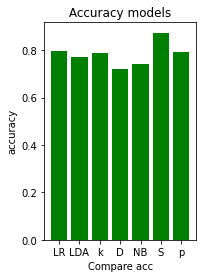

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
names = ['LR','LDA','k','D','NB','S','p']
plt.bar(names,model_list,color='green', label =' accuracy')
plt.title(' Accuracy models ')
plt.xlabel('Compare acc')
plt.ylabel('accuracy')

Vậy áp dụng model SVC cho bài toán

In [ ]:
import pickle 
# Save the trained model as a pickle string. 
filename = '/content/drive/My Drive/Model/S.sav'
pickle.dump(SVC(), open(filename, 'wb'))

In [ ]:
# Load the pickled model 
import pickle
loaded_model = pickle.load(open(filename, 'rb'))

**TINH CHỈNH THAM SỐ**

In [ ]:
from sklearn.model_selection import GridSearchCV


Tinh chỉnh tham số C và gamma

In [ ]:
para = {'C':[1,3], 'gamma':['scale','auto']}
g= GridSearchCV(SVC(),param_grid= para)

In [ ]:
g.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 3], 'gamma': ['scale', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#Chọn bộ tham số cho độ chính xác cao nhất
g.best_estimator_

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
g.score(X_test, Y_test)

0.8849744052996086

Ta thấy sau khi tinh chỉnh thì độ chính xác đã cao hơn so với trước khi tinh chỉnh (0.8732309545317676), ta tiến hành tinh chỉnh lần thứ 2 để xem kết quả

In [ ]:
newS = g.best_estimator_

In [ ]:
import pickle 
# Save the trained model as a pickle string. 
filename2 = '/content/drive/My Drive/Model/newS.sav'
pickle.dump(newS, open(filename, 'wb'))

In [9]:
import pickle
f = '/content/drive/My Drive/Model/newS.sav'
loaded_model = pickle.load(open(f, 'rb'))

Tinh chỉnh lần 2

In [ ]:
para2 = {'C':[4,5], 'gamma':['scale']}
g2= GridSearchCV(SVC(),param_grid= para2)

In [ ]:
g2.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [4, 5], 'gamma': ['scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
g2.best_estimator_

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
g2.score(X_test, Y_test)

0.8846732911773563

kết quả sau khi tinh chỉnh lần 2 không lớn hơn kết quả lần đầu. Vậy chọn model newS làm model chính thức

**Xử lí ảnh input đưa vào trước khi dự đoán**

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , precision_score, recall_score
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def detect (img):
  img_1 = img
  input = img
  ##cv2_imshow(img_1)
  input = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
  input = cv2.resize(input,(50,50), Image.ANTIALIAS)
  input = np.reshape(input, 50*50)
  input = (np.asarray(input)/255.0)   
  result = loaded_model.predict([input])
  return(result)


Using TensorFlow backend.


**Cài đặt thư viện face_recognition**

In [ ]:
!pip install dlib
!pip install face_recognition

In [5]:
import face_recognition

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 109783587_287221932359261_7903660508333721988_n.jpg to 109783587_287221932359261_7903660508333721988_n.jpg


User uploaded file "109783587_287221932359261_7903660508333721988_n.jpg" with length 59647 bytes


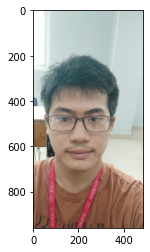

Found 1 face(s) in this photograph.
A face is located at pixel location Top: 409, Left: 82, Bottom: 676, Right: 349


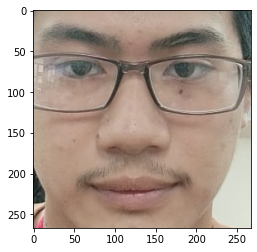

                Male


In [10]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  image = face_recognition.load_image_file(fn)

  plt.imshow(image)
  plt.show()  
  
  face_locations = face_recognition.face_locations(image)

  print("Found {} face(s) in this photograph.".format(len(face_locations)))

  for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    #Tìm ra các khuôn mặt trong hình và tiến hành dự đoán
    face_image = image[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()
    if detect(face_image):
      print( "               Female")
    else:
      print("                Male")
    